In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
df = pd.read_csv('Data/insurance - insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


For each question, make sure to:

- State your Null Hypothesis and Alternative Hypothesis

- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result

Q1. Do smokers have higher insurance charges than non-smokers?

In [10]:
#dropping null values from needed columns 
df = df.dropna(subset = ['smoker','charges'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


$H_0$: Smokers do not have higher insurance charges than Non-Smokers.

$H_1$: Smokers do have higher insurance charges than Nom-Smokers.

The correct test to perform:
- Data type: Numeric 
- Groups: 2

**Best test: 2 Sample t-test**

In [11]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [16]:
#creating column that separates smokers
df['is_smoker'] = df['smoker'].str.contains('yes')
df.head(2)

,age,sex,bmi,children,smoker,region,charges,is_smoker,has_smoker
0,19,female,27.90,0,yes,southwest,16884.9240,True,True
1,18,male,33.77,1,no,southeast,1725.5523,False,False


In [17]:
df['is_smoker'].value_counts()

False    1064
True      274
Name: is_smoker, dtype: int64

In [19]:
#making a table that only has is_smoker and the charges
needed_cols = ['charges','is_smoker']

df[needed_cols]

,charges,is_smoker
0,16884.92400,True
1,1725.55230,False
2,4449.46200,False
3,21984.47061,False
4,3866.85520,False
...,...,...
1333,10600.54830,False
1334,2205.98080,False
1335,1629.83350,False
1336,2007.94500,False


In [21]:
#saving non_smokers in a different column
non_smoker_df = df.loc[ df['is_smoker']==False, needed_cols]

non_smoker_df.head()

,charges,is_smoker
1,1725.55230,False
2,4449.46200,False
3,21984.47061,False
4,3866.85520,False
5,3756.62160,False


In [24]:
non_smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 1 to 1336
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   charges    1064 non-null   float64
 1   is_smoker  1064 non-null   bool   
dtypes: bool(1), float64(1)
memory usage: 17.7 KB


In [23]:
smoker_df = df.loc[df['is_smoker']== True, needed_cols]

smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1337
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   charges    274 non-null    float64
 1   is_smoker  274 non-null    bool   
dtypes: bool(1), float64(1)
memory usage: 4.5 KB


In [28]:
#concatinating the groups for visualization
plot_df = pd.concat([smoker_df, non_smoker_df])

plot_df

,charges,is_smoker
0,16884.9240,True
11,27808.7251,True
14,39611.7577,True
19,36837.4670,True
23,37701.8768,True
...,...,...
1332,11411.6850,False
1333,10600.5483,False
1334,2205.9808,False
1335,1629.8335,False


<AxesSubplot: xlabel='charges', ylabel='Count'>

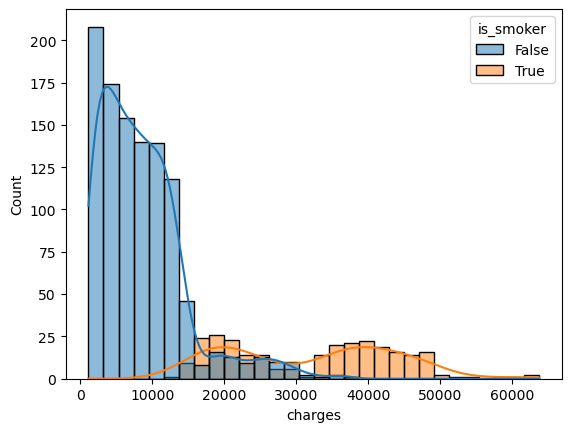

In [29]:
## visualize the group means
sns.histplot(data=plot_df, x='charges',kde=True, hue='is_smoker')

<AxesSubplot: xlabel='is_smoker', ylabel='charges'>

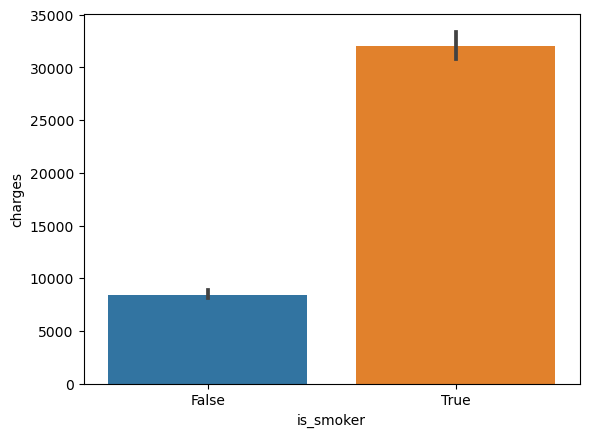

In [30]:
sns.barplot(data= plot_df,y = 'charges', x= 'is_smoker')

Testing assumptions:

In [31]:
# 1. Are there any significant outliers
## Saving JUST the numeric col as final group variables

smoker_group = smoker_df['charges']
non_smoker_group = non_smoker_df['charges']
smoker_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [35]:
#checking smoker group for outliers
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3

smoker_outliers.value_counts()


False    274
Name: charges, dtype: int64

There are no outliers for smokers

In [36]:
#checking smoker group for outliers
non_smoker_outliers = np.abs(stats.zscore(non_smoker_group)) > 3

non_smoker_outliers.value_counts()

False    1040
True       24
Name: charges, dtype: int64

In [39]:
#there are some outliers
#removeing them
non_smoker_group = non_smoker_group[~non_smoker_outliers]
non_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

Test for Normality 

In [47]:
# Check female group for normality
result = stats.normaltest(smoker_group)
print(result)

result.pvalue < .05

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)


True

In [42]:
len(smoker_group)

274

In [46]:
# Check female group for normality
result = stats.normaltest(non_smoker_group)
print(result)

result.pvalue < .05

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)


True

In [44]:
len(non_smoker_group)

1040

Here we can say that our distribution is NOT normal. As it is shown in the visualization and also in the p < 0.05

Testing for equal variance

In [49]:
## Use Levene's test for equal variance
result = stats.levene(smoker_group,non_smoker_group)
print(result)
result.pvalue<.05

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)


True

In [50]:
# Using an if-else to help interpret the p-value
if result.pvalue <.05:
    print('The groups DO NOT have equal variance')
else:
    print('The groups DO have equal variance')

The groups DO NOT have equal variance


Final Hypothesis Test

In [53]:
## run final hypothess test
result = stats.ttest_ind(smoker_group,non_smoker_group,equal_var=False)
print(result)

result.pvalue<0.05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)


True

In [54]:
## make a plot or calcualte group means to know which group had more/less.
smoker_group.mean(),non_smoker_group.mean()

(32050.23183153284, 7939.8608446721155)

### Final Conclusion:
#### We reject the Null Hypothesis
#### We accept the Alternative Hypothesis that there is a significant difference between insurance charges for people who are smoker vs. who are not smokers.

Q2. Are men more likely to smoke than women?

Q3. Do different regions have different charges, on average?